In [96]:
# IMPORTING IMPORTANT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM

# FUNCTION TO CREATE 1D DATA INTO TIME SERIES DATASET
def new_dataset(dataset, step_size):
	data_X, data_Y = [], []
	for i in range(len(dataset)-step_size-1):
		a = dataset[i:(i+step_size), 0]
		data_X.append(a)
		data_Y.append(dataset[i + step_size, 0])
	return np.array(data_X), np.array(data_Y)

# THIS FUNCTION CAN BE USED TO CREATE A TIME SERIES DATASET FROM ANY 1D ARRAY

In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:

# FOR REPRODUCIBILITY
np.random.seed(7)

# IMPORTING DATASET
dataset = pd.read_csv('/content/drive/MyDrive/LSTM/apple_share_price.csv', usecols=[1,2,3,4])
dataset = dataset.reindex(index = dataset.index[::-1])

# CREATING OWN INDEX FOR FLEXIBILITY
obs = np.arange(1, len(dataset) + 1, 1)



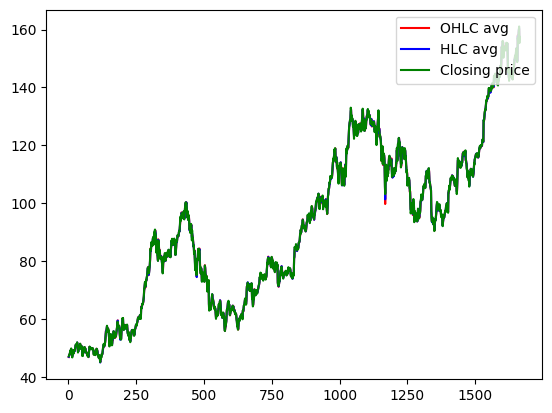

In [99]:
# TAKING DIFFERENT INDICATORS FOR PREDICTION
OHLC_avg = dataset.mean(axis = 1)
HLC_avg = dataset[['High', 'Low', 'Close']].mean(axis = 1)
close_val = dataset[['Close']]

# PLOTTING ALL INDICATORS IN ONE PLOT
plt.plot(obs, OHLC_avg, 'r', label = 'OHLC avg')
plt.plot(obs, HLC_avg, 'b', label = 'HLC avg')
plt.plot(obs, close_val, 'g', label = 'Closing price')
plt.legend(loc = 'upper right')
plt.show()


In [100]:
# PREPARATION OF TIME SERIES DATASE
OHLC_avg = np.reshape(OHLC_avg.values, (len(OHLC_avg),1)) # 1664
scaler = MinMaxScaler(feature_range=(0, 1))
OHLC_avg = scaler.fit_transform(OHLC_avg)

# TRAIN-TEST SPLIT
train_OHLC = int(len(OHLC_avg) * 0.75)
test_OHLC = len(OHLC_avg) - train_OHLC
train_OHLC, test_OHLC = OHLC_avg[0:train_OHLC,:], OHLC_avg[train_OHLC:len(OHLC_avg),:]

# TIME-SERIES DATASET (FOR TIME T, VALUES FOR TIME T+1)
trainX, trainY = new_dataset(train_OHLC, 1)
testX, testY = new_dataset(test_OHLC, 1)

# RESHAPING TRAIN AND TEST DATA
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
step_size = 1


In [101]:
# LSTM MODEL
model = Sequential()
model.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
model.add(LSTM(16))
model.add(Dense(1))
model.add(Activation('linear'))

In [102]:
# MODEL COMPILING AND TRAINING
model.compile(loss='mean_squared_error', optimizer='adam') # Try SGD, adam, adagrad and compare!!!
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
1246/1246 - 8s - loss: 0.0108 - 8s/epoch - 6ms/step
Epoch 2/50
1246/1246 - 3s - loss: 2.2838e-04 - 3s/epoch - 3ms/step
Epoch 3/50
1246/1246 - 3s - loss: 1.5929e-04 - 3s/epoch - 3ms/step
Epoch 4/50
1246/1246 - 4s - loss: 1.6031e-04 - 4s/epoch - 3ms/step
Epoch 5/50
1246/1246 - 3s - loss: 1.5250e-04 - 3s/epoch - 3ms/step
Epoch 6/50
1246/1246 - 4s - loss: 1.8068e-04 - 4s/epoch - 3ms/step
Epoch 7/50
1246/1246 - 6s - loss: 1.7885e-04 - 6s/epoch - 5ms/step
Epoch 8/50
1246/1246 - 4s - loss: 1.6979e-04 - 4s/epoch - 3ms/step
Epoch 9/50
1246/1246 - 3s - loss: 1.7951e-04 - 3s/epoch - 3ms/step
Epoch 10/50
1246/1246 - 3s - loss: 1.6938e-04 - 3s/epoch - 3ms/step
Epoch 11/50
1246/1246 - 4s - loss: 1.7966e-04 - 4s/epoch - 3ms/step
Epoch 12/50
1246/1246 - 3s - loss: 1.7265e-04 - 3s/epoch - 3ms/step
Epoch 13/50
1246/1246 - 3s - loss: 1.7762e-04 - 3s/epoch - 3ms/step
Epoch 14/50
1246/1246 - 3s - loss: 1.6959e-04 - 3s/epoch - 3ms/step
Epoch 15/50
1246/1246 - 4s - loss: 1.6718e-04 - 4s/epoch - 4m

In [103]:
# PREDICTION
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

13/13 [==============================] - 0s 2ms/step


In [104]:
print(trainY.shape)
print(testY.shape)

(1246,)
(414,)


In [105]:
trainY = scaler.inverse_transform(trainY.reshape(-1, 1))
testY = scaler.inverse_transform(testY.reshape(-1, 1))

In [106]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

In [107]:
from sklearn.metrics import mean_squared_error

In [108]:
print("trainY shape:", trainY.shape)
print("trainPredict shape:", trainPredict.shape)

trainY shape: (1246, 1)
trainPredict shape: (1246, 1)


In [109]:
print(trainY.shape)

(1246, 1)


In [110]:
print(testY.shape)


(414, 1)


In [111]:
# DE-NORMALIZING FOR PLOTTING
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

In [112]:
# TRAINING RMSE

trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))

print('Train RMSE: %.2f' % (trainScore))

Train RMSE: 1138272.29


In [113]:
print(testY.shape)
print(testPredict.shape)

(414, 1)
(414, 1)


In [114]:
# TEST RMSE

# Ensure that testY and testPredict have the same number of samples
testY = testY[0:414]

# Calculate the RMSE
testScore = math.sqrt(mean_squared_error(testY, testPredict))

# Print the RMSE
print('Test RMSE: %.2f' % (testScore))

Test RMSE: 1582710.10


In [115]:
# CREATING SIMILAR DATASET TO PLOT TRAINING PREDICTIONS
trainPredictPlot = np.empty_like(OHLC_avg)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict

In [116]:
# CREATING SIMILAR DATASSET TO PLOT TEST PREDICTIONS
testPredictPlot = np.empty_like(OHLC_avg)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(step_size*2)+1:len(OHLC_avg)-1] = testPredict

In [117]:
# DE-NORMALIZING MAIN DATASET
OHLC_avg = scaler.inverse_transform(OHLC_avg)

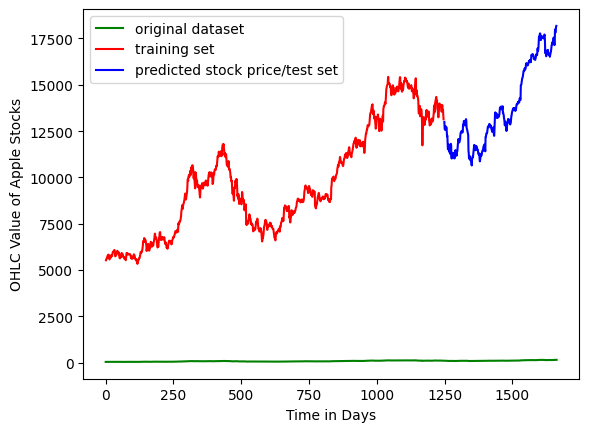

In [118]:
# PLOT OF MAIN OHLC VALUES, TRAIN PREDICTIONS AND TEST PREDICTIONS
plt.plot(OHLC_avg, 'g', label = 'original dataset')
plt.plot(trainPredictPlot, 'r', label = 'training set')
plt.plot(testPredictPlot, 'b', label = 'predicted stock price/test set')
plt.legend(loc = 'upper left')
plt.xlabel('Time in Days')
plt.ylabel('OHLC Value of Apple Stocks')
plt.show()



In [119]:
# PREDICT FUTURE VALUES
last_val = testPredict[-1]
last_val_scaled = last_val/last_val
next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
print ("Last Day Value:", np.squeeze(last_val))
print ("Next Day Value:", np.squeeze(last_val*next_val))

1/1 [==============================] - 0s 22ms/step
Last Day Value: 18178.19
Next Day Value: 17753.95
